In [1]:
import os, shutil

train_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\train"
validation_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\validation"
test_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\test"
train_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\train\esc"
train_no_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\train\no_esc"
validation_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\validation\esc"
validation_no_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\validation\no_esc"
test_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\test\esc"
test_no_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\test\no_esc"

In [2]:
print('total training e scooter rider images:', len(os.listdir(train_esc_dir)))
print('total training non e scooter rider images:', len(os.listdir(train_no_esc_dir)))
print('total validation e scooter rider images:', len(os.listdir(validation_esc_dir)))
print('total validation non e scooter rider images:', len(os.listdir(validation_no_esc_dir)))
print('total test e scooter rider images:', len(os.listdir(test_esc_dir)))
print('total test non e scooter rider images:', len(os.listdir(test_no_esc_dir)))

total training e scooter rider images: 6441
total training non e scooter rider images: 6441
total validation e scooter rider images: 779
total validation non e scooter rider images: 779
total test e scooter rider images: 1269
total test non e scooter rider images: 1226


In [3]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
________________________________________________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

Found 12882 images belonging to 2 classes.
Found 1558 images belonging to 2 classes.
Found 2495 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:',labels_batch.shape)
    break

data batch shape: (32, 160, 160, 3)
label batch shape: (32,)


In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=128, epochs=80, validation_data=validation_generator,validation_steps=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/80
128/128 [==============================] - 19s 148ms/step - loss: 0.6109 - acc: 0.6484 - val_loss: 0.5966 - val_acc: 0.6857
Epoch 2/80
128/128 [==============================] - 11s 88ms/step - loss: 0.4934 - acc: 0.7573 - val_loss: 0.6683 - val_acc: 0.6429
Epoch 3/80
128/128 [==============================] - 11s 87ms/step - loss: 0.4320 - acc: 0.8011 - val_loss: 0.5318 - val_acc: 0.7174
Epoch 4/80
128/128 [==============================] - 12s 95ms/step - loss: 0.3770 - acc: 0.8296 - val_loss: 0.4985 - val_acc: 0.7612
Epoch 5/80
128/128 [==============================] - 12s 90ms/step - loss: 0.3423 - acc: 0.8538 - val_loss: 0.4881 - val_acc: 0.7664
Epoch 6/80
128/128 [==============================] - 12s 91ms/step - loss: 0.3043 - acc: 0.8703 - val_loss: 0.6030 - val_acc: 0.6909
Epoch 7/80
128/128 [==============================] - 12s 93ms/step - loss: 0.2683 - acc: 0.8916 - val_loss: 0.4616 - val_acc: 0.8000
Epoch 8/80
12

Epoch 60/80
128/128 [==============================] - 10s 81ms/step - loss: 0.0256 - acc: 0.9949 - val_loss: 0.8906 - val_acc: 0.8425
Epoch 61/80
128/128 [==============================] - 10s 81ms/step - loss: 0.0090 - acc: 0.9980 - val_loss: 1.0621 - val_acc: 0.8364
Epoch 62/80
128/128 [==============================] - 10s 78ms/step - loss: 0.0154 - acc: 0.9958 - val_loss: 1.2103 - val_acc: 0.8305
Epoch 63/80
128/128 [==============================] - 11s 83ms/step - loss: 0.0162 - acc: 0.9961 - val_loss: 0.8287 - val_acc: 0.8335
Epoch 64/80
128/128 [==============================] - 11s 83ms/step - loss: 0.0019 - acc: 0.9998 - val_loss: 1.2677 - val_acc: 0.8288
Epoch 65/80
128/128 [==============================] - 10s 81ms/step - loss: 0.0268 - acc: 0.9958 - val_loss: 1.3769 - val_acc: 0.8153
Epoch 66/80
128/128 [==============================] - 11s 85ms/step - loss: 0.0086 - acc: 0.9980 - val_loss: 0.8288 - val_acc: 0.8455
Epoch 67/80
128/128 [==============================] - 

In [8]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.74625


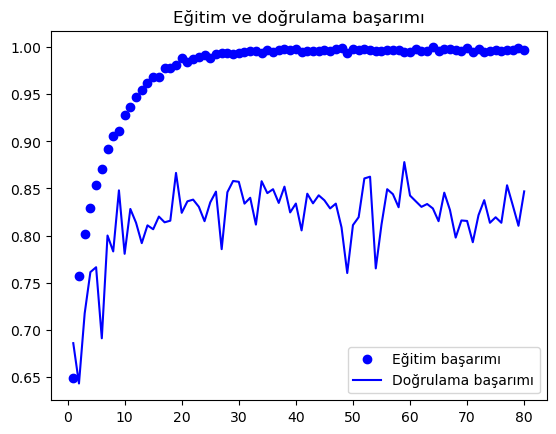

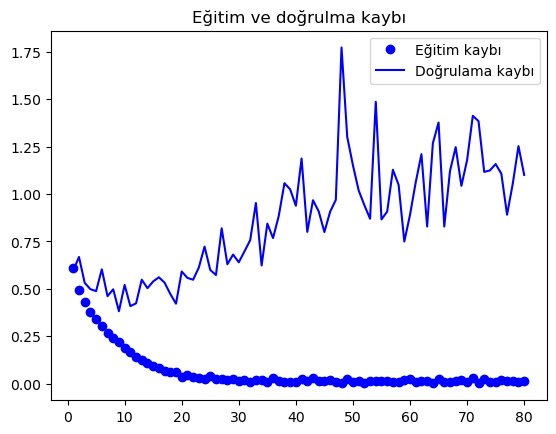

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama başarımı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulma kaybı')
plt.legend()

plt.show()

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

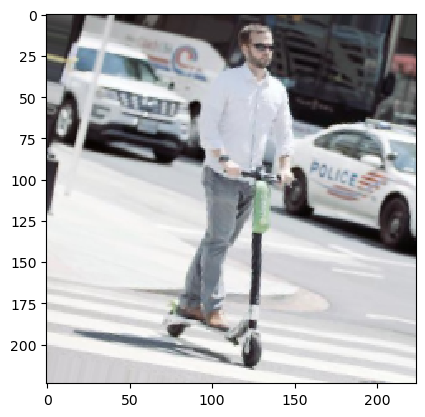

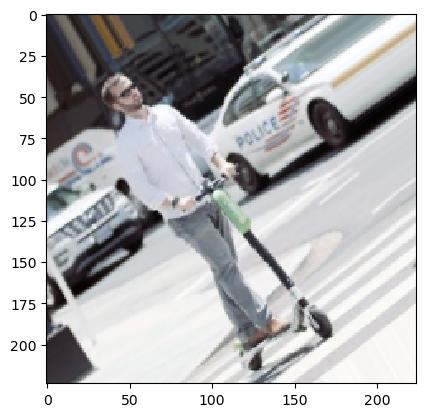

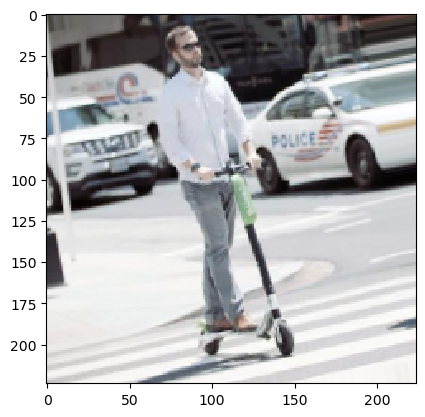

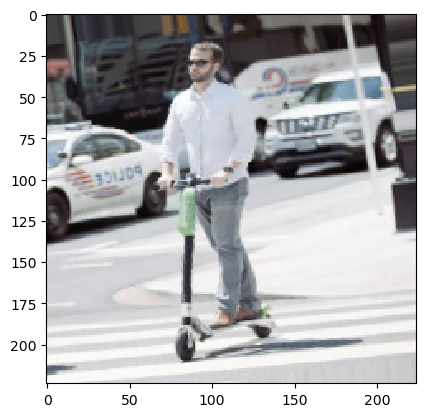

In [11]:
from keras_preprocessing import image

fnames = [os.path.join(train_esc_dir, fname) for fname in os.listdir(train_esc_dir) ]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=128,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=128)

Found 12882 images belonging to 2 classes.
Found 1558 images belonging to 2 classes.
Epoch 1/50
128/128 [==============================] - 29s 224ms/step - loss: 0.6843 - acc: 0.5337 - val_loss: 0.6629 - val_acc: 0.6170
Epoch 2/50
128/128 [==============================] - 26s 207ms/step - loss: 0.6088 - acc: 0.6756 - val_loss: 0.6864 - val_acc: 0.5691
Epoch 3/50
128/128 [==============================] - 27s 207ms/step - loss: 0.5750 - acc: 0.7021 - val_loss: 0.6528 - val_acc: 0.6398
Epoch 4/50
128/128 [==============================] - 27s 208ms/step - loss: 0.5630 - acc: 0.7017 - val_loss: 0.6125 - val_acc: 0.6542
Epoch 5/50
128/128 [==============================] - 27s 207ms/step - loss: 0.5419 - acc: 0.7275 - val_loss: 0.7491 - val_acc: 0.5841
Epoch 6/50
128/128 [==============================] - 27s 207ms/step - loss: 0.5341 - acc: 0.7358 - val_loss: 0.5141 - val_acc: 0.7610
Epoch 7/50
128/128 [==============================] - 26s 205ms/step - loss: 0.5050 - acc: 0.7438 - val_l

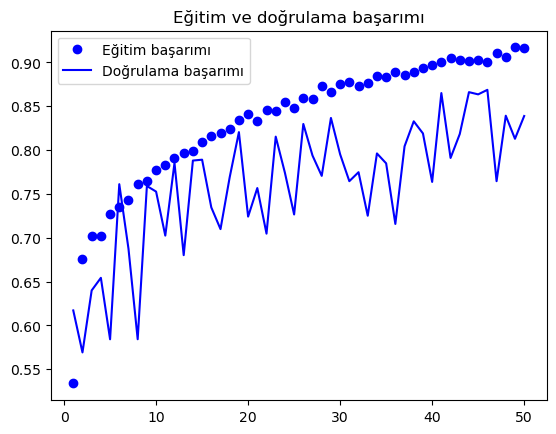

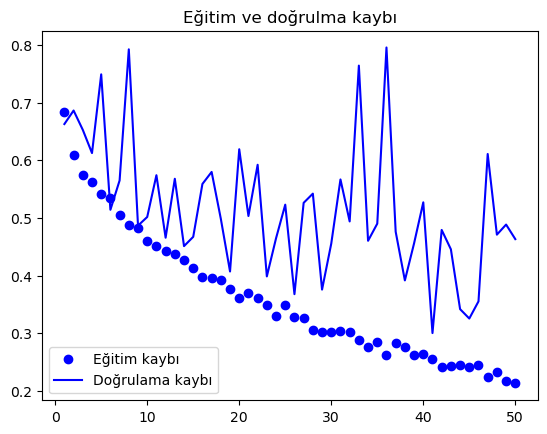

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama başarımı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulma kaybı')
plt.legend()

plt.show()

In [15]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.82875


In [16]:
from keras.applications import MobileNetV2

In [17]:
conv_base = MobileNetV2(input_shape=(160,160,3),
                        include_top=False,
                        weights='imagenet')

In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False

In [19]:
 model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               8192256   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 10,450,497
Trainable params: 8,192,513
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [21]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 22s 221ms/step - loss: 0.5523 - acc: 0.7391 - val_loss: 0.5075 - val_acc: 0.7623
Epoch 2/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4032 - acc: 0.8211 - val_loss: 0.3742 - val_acc: 0.8252
Epoch 3/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3418 - acc: 0.8588 - val_loss: 0.6595 - val_acc: 0.7214
Epoch 4/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3434 - acc: 0.8516 - val_loss: 0.3592 - val_acc: 0.8491
Epoch 5/30
100/100 [==============================] - 20s 203ms/step - loss: 0.3315 - acc: 0.8665 - val_loss: 0.3391 - val_acc: 0.8547
Epoch 6/30
100/100 [==============================] - 19s 187ms/step - loss: 0.3040 - acc: 0.8762 - val_loss: 0.3577 - val_acc: 0.8459
Epoch 7/30
100/100 [==============================] - 19s 187ms/step - loss: 0.2793 - acc: 0.8850 - val_loss: 0.5984 - val_acc: 0.7686
Epoch 8/30
100/100 [==============================] - 1

In [22]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=200)
print('test acc:', test_acc)

test acc: 0.8054079398880828


In [23]:
conv_base.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [24]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block_16_project (Conv2D)':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 231ms/step - loss: 0.1895 - acc: 0.9273 - val_loss: 0.3755 - val_acc: 0.8447
Epoch 2/100
100/100 [==============================] - 19s 194ms/step - loss: 0.1729 - acc: 0.9406 - val_loss: 0.3426 - val_acc: 0.8698
Epoch 3/100
100/100 [==============================] - 20s 200ms/step - loss: 0.1826 - acc: 0.9272 - val_loss: 0.3942 - val_acc: 0.8377
Epoch 4/100
100/100 [==============================] - 20s 199ms/step - loss: 0.1787 - acc: 0.9322 - val_loss: 0.3730 - val_acc: 0.8478
Epoch 5/100
100/100 [==============================] - 21s 209ms/step - loss: 0.1655 - acc: 0.9319 - val_loss: 0.3496 - val_acc: 0.8566
Epoch 6/100
100/100 [==============================] - 20s 200ms/step - loss: 0.1555 - acc: 0.9437 - val_loss: 0.4486 - val_acc: 0.8145
Epoch 7/100
100/100 [==============================] - 20s 196ms/step - loss: 0.1716 - acc: 0.9338 - val_loss: 0.2937 - val_acc: 0.8899
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 23s 233ms/step - loss: 0.1258 - acc: 0.9547 - val_loss: 0.3639 - val_acc: 0.8535
Epoch 62/100
100/100 [==============================] - 22s 225ms/step - loss: 0.1227 - acc: 0.9519 - val_loss: 0.3006 - val_acc: 0.8774
Epoch 63/100
100/100 [==============================] - 23s 226ms/step - loss: 0.1184 - acc: 0.9570 - val_loss: 0.3009 - val_acc: 0.8704
Epoch 64/100
100/100 [==============================] - 23s 234ms/step - loss: 0.1354 - acc: 0.9534 - val_loss: 0.3894 - val_acc: 0.8428
Epoch 65/100
100/100 [==============================] - 23s 228ms/step - loss: 0.1078 - acc: 0.9579 - val_loss: 0.3170 - val_acc: 0.8711
Epoch 66/100
100/100 [==============================] - 23s 226ms/step - loss: 0.1191 - acc: 0.9553 - val_loss: 0.3098 - val_acc: 0.8767
Epoch 67/100
100/100 [==============================] - 22s 223ms/step - loss: 0.1242 - acc: 0.9559 - val_loss: 0.3327 - val_acc: 0.8610
Epoch 68/100
100/100 [===================

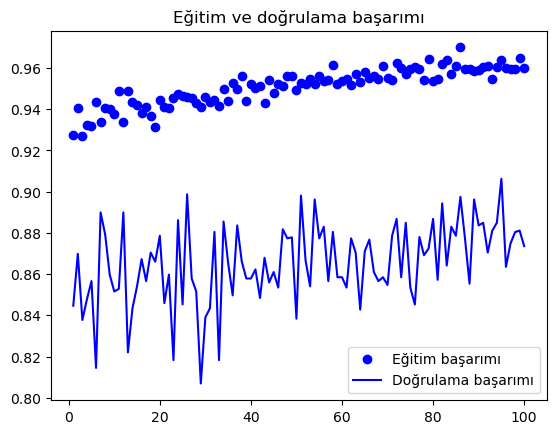

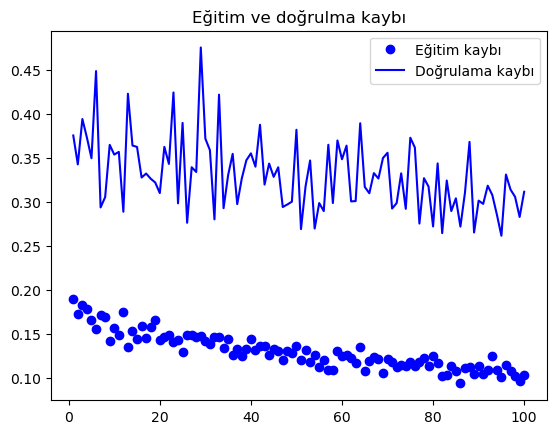

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama başarımı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulma kaybı')
plt.legend()

plt.show()

In [27]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=200)
print('test acc:', test_acc)

test acc: 0.8252578930077459
